In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg

In [4]:
import numpy as np
a = np.array([[-4,	1,	1,	0,	0,	0
], [1,	-4,	0,	1,	0,	0
], [1,	0,	-4,	1,	1,	0
], [ 0,	1,	1,	-4,	0,	1
] , [0,	0,	1,	0,	-4,	1
] ,[0,	0,	0,	1,	1,	-4
]])
b = np.array([-150,-50,-200,-100,-100,0
])
from scipy import linalg
x = linalg.solve(a, b)
x

array([ 74.94824017,  48.86128364, 100.93167702,  70.49689441,
        58.2815735 ,  32.19461698])

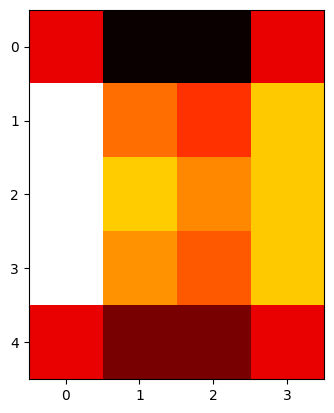

In [5]:
ar = [ [0,-100,-100, 0], [200, 58.2815735 ,  32.19461698, 100], [200, 100.93167702,  70.49689441,100], [200, 74.94824017,  48.86128364,100], [0,-50,-50,0] ]
plt.imshow(ar, cmap='hot')

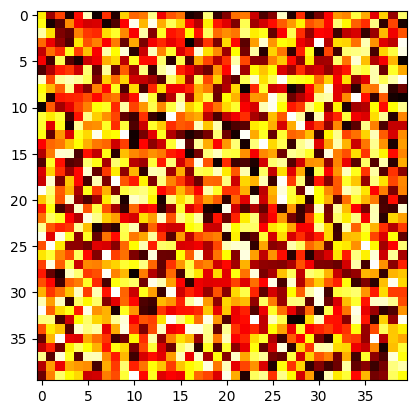

In [6]:
ar2 = np.random.random((40,40))
plt.imshow(ar2, cmap='hot')
